<h1 align = 'center'> Jupyter ile Yapay Sinir Ağları </h1>
<h2 align = 'center'> Kısım 2: İleri Yayılım </h2>


<h4 align = 'center' > Welch Labs </h4>

<h3 align = 'center'> Değişkenler </h3>

|Koddaki Sembol | Matematiksel Sembol | Tanım | Boyutlar
| :-: | :-: | :-: | :-: |
|X|$$X$$|Giriş Verisi, her satır bir örnek| (numExamples, inputLayerSize)|
|y |$$y$$| Hedef Veri |(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Katman 1 ağırlıklar | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Katman 2 ağırlıklar | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Katman 2 aktivasyon | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Katman 2 aktivite | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Katman 3 aktivasyon | (numExamples, outputLayerSize) |

Ağ yapımızı bir python sınıfı(class) olarak tanımlayacağız giriş metodumuz session için değişkenleri ve sabitleri ekleyecek. Değişken ve sabitlere tüm sınıfların dışarıdan ulaşılabilmesini istiyorsak, public nesneler halinde çağırmamız gerekli. Bunun için de C#'ta this metoduyla olduğu gibi Python'da da self metoduyla çağırıyoruz. self.deger veya değişken adı diyerek harici sınıflardan da bu değerleri çağırabilmekteyiz.

In [11]:
#İlk kitabımızdan değerlerimizi taşıyalım
%pylab inline
from partOne import *

Populating the interactive namespace from numpy and matplotlib



Ağımızda 2 giriş ,  3 saklı katman ve 1 çıkış katmanı bulunuyor. bunlar bizim hiperparametrelerimiz. Hiperparametreler bir sinir ağının yapısını ve davranışını belirleyen sabitlerdir. Ağımızı eğitirken değiştirilemezler.

Öğrenme algoritmamız bir başka ara katmana ihtiyaç duyup duymadığını hesaba katamaz. Bu yüzden eğitimden önce hiperparametrelere bizim karar vermemiz gereklidir. Sinir ağları parametrelerden, sinapslardaki ağırlıklardan öğrenir.

Verileri ağımızda forward metodu ile tek seferde çoklu girdi değerleri matrisleri olarak taşırız. Bu bize Matlab ya da numpy gibi araçlar kullanırken performans optimizasyonu sağlar. X matrisindeki her giriş değeri, kendine karşılık gelen bir ağırlıkla çarpılıp, diğer nöronlardan gelen değerlerle toplanmalıdır.

In [12]:
print (X.shape, y.shape)

(3, 2) (3, 1)


Giriş verilerimizin oluşturduğu matrisin 3'e 2'lik bir matris olmasının sebebi 3 adet 2 boyutlu veriye sahip olmamızdan kaynaklanıyor. Buna bağlı olarak çıkış değeri olan y, ya da tahmin değerimiz olan yhat, 3 adet 2 boyutlu veriden tek boyutlu skeler bir sonuç ürettiği için 3'e 1'lik bir matristir.

X matrisindeki her giriş değeri, kendine karşılık gelen bir W ağırlıkla çarpılıp, diğer nöronlardan gelen değerlerle toplanmalıdır. z(2) ikinci katmanın aktvitesidir. Her katmanda z değerleri, o katmana air saklı nöronların ağırlıklarla çarpılıp toplanmasıdır. Bu yüzden z her örnek için bir satırı temsil eder. Her saklı değer için birer sütun ve her örnek için bir satır bize 3'e 3 lük bir matris verecektir.

Sinapsların görevi aldıkları giriş değerini spesifik bir ağırlık değeriyle çarparak bir sonraki nörona iletmek, Nöronlar ise bağlı olan tüm sinapslardan gelen girişleri toplamak ve aktivasyon fonksiyonuna sokmaktır demiştik.

z= x1+ x2+ x3 ; 
a = 1/(1+e-Z)

Aktivasyon fonksiyonları ile kompleks, nonlineer fonksiyonlar oluşturulabilir.
Biz modelimizde sigmoid aktivasyon fonksiyonu kullanacağız.

Sigmoid aktivasyonu sürekli ve türevlenebilen bir fonksiyondur. Doğrusal olmadığından ysa'da oldukça sık kullanılır. Girdi değerlerinin her biri için 0 ile 1 arasında bir değer üretir.

İkinci katman z değeri elimizde olduğuna göre sigmoid aktivasyon fonksiyonumuzu uygulayabiliriz. Burada numpy sayesinde gönderdiğimiz değişken skaler, vektör ya da matris olabilir, numpy aktivasyon fonksiyonunu her element için tek tek uygular, sonucu ise aynı boyutta döndürür. 

In [13]:
class Neural_Network(object):
    #Sinir Ağları adında, nesne alan bir sınıf oluşturduk,
    #Giriş değerlerini atayacak bir initial metod tanımlayalım.
    def __init__(self): 
        #Hiperparametreleri tanımlayalım.
        self.inputLayerSize = 2
        #2 Adet Giriş Ağırlığımız var, 2 giriş parametresi olduğunu belirtiyoruz.
        self.outputLayerSize = 1
        #1 Çıkış yhat skaler değerimiz için 1 parametre alacağını belirtiyoruz.
        self.hiddenLayerSize = 3
        #3 Ara Katmanımız bulunmakta.
    def forward(self, X):
        #Giriş değerlerinin Ağımızda ilerlemesi için forward metodunu kullanırız.
        self.z2 = np.dot(X, self.W1)
        #İkinci katman için W1 ağırlıklarını dot product olarak üretiyoruz
        self.a2 = self.sigmoid(self.z2)
        #İkinci katman için Aktivasyon değerini hesaplıyoruz 
        self.z3 = np.dot(self.a2, self.W2)
        #Üçüncü katman için W2 ağırlıklarına ikinci katmandaki aktivasyon 
        #değerini dot product olarak ürettiriyoruz
        yHat = self.sigmoid(self.z3) 
        #yHat bizim tahmin sonucumuz.
        return yHat
        

$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$


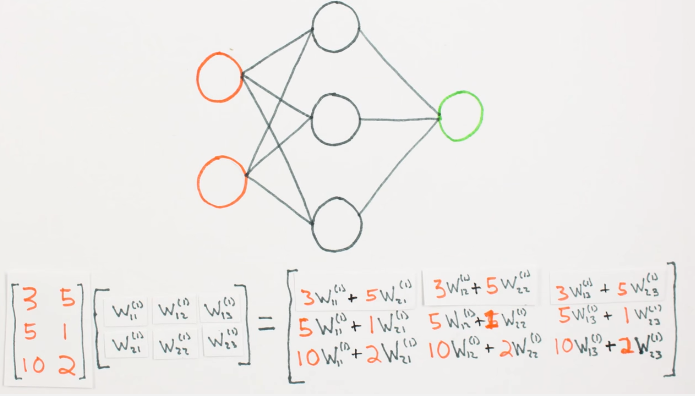

In [14]:
from IPython.display import Image
i = Image(filename='images/matrixmultiplication.png')
i

In [15]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

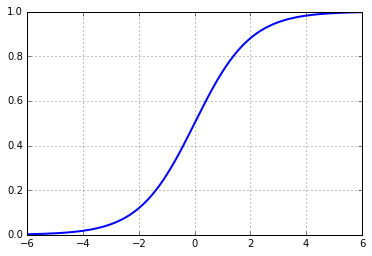

In [16]:
testInput = np.arange(-6,6,0.01)
plot(testInput, sigmoid(testInput), linewidth= 2)
grid(1)
#Örnek sigmoid fonksiyonu

In [17]:
sigmoid(1)

0.7310585786300049

In [18]:
sigmoid(np.array([-1,0,1]))

array([ 0.26894142,  0.5       ,  0.73105858])

In [19]:
sigmoid(np.random.randn(3,3))

array([[ 0.41564745,  0.47579016,  0.60821143],
       [ 0.5578299 ,  0.6960842 ,  0.51123605],
       [ 0.78966134,  0.6266845 ,  0.42944555]])

İleri yayılım için elimizdeki ikinci formül ile ikinci katmandaki aktivasyon değeri a(2) değerini hesaplamak için f fonksiyonunu kullanıyoruz, a(2) değeri z(2) gibi 3'e 3'lük bir matris olacaktır.

$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$

İleri yayılımı tamamlamak için bir katmanı daha hesaplamamız gerekiyor.
İkinci katmandaki ağırlıklarımıza bir kere daha aktivasyon fonksiyonunu uyguladıktan sonra yHat değerine ulaşacağız.

W2 ağırlıkları her sinaps için bir satır olmak üzere 3'e 1'lik bir matris olacaktır. Aktivasyon fonksiyonu uygulandıktan sonra elimizde z(3) üçüncü katman değeri olacaktır. Z(3)'ün her bir örnek için birer değer olmak üzere 3 aktivite değeri olacaktır. z(3)'e aktivasyon fonksiyonunu uyguladıktan sonra yHat değerini, yani sonucu bulmuş olacağız.

$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$

In [20]:
class Neural_Network(object):
    def __init__(self):        
        #Hiperparametrelerimiz
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Ağırlıklarımız 
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #İleri yayılım metodumuz
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Sigmoid fonksiyonumuz
        return 1/(1+np.exp(-z))

Şu anda, çalıştığımız saat ve uyuduğumuz saat değerlerini rastgele üreten ve sonucu hesaplayan bir sınıfa sahibiz. Fakat tahmin değerlerimiz ağımız henüz eğitilmediği için hazır değil. 